In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
import os
print(os.listdir())  # This will show all files in the current directory


['.ipynb_checkpoints', 'Titanic-Dataset.csv', 'Untitled1.ipynb']


In [3]:
df = pd.read_csv("Titanic-Dataset.csv")  
df.head() 

FileNotFoundError: [Errno 2] No such file or directory: 'Titanic-Dataset.csv'

In [4]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\python 1\.ipynb_checkpoints/Titanic-Dataset.csv.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
import re 

# 1. Fill missing values in Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# 2. Drop Cabin column (too many missing values)
df.drop(columns=["Cabin"], inplace=True)

# 3. Fill missing values in Embarked with most frequent value
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# 4. Remove special characters from Name column
df["Name"] = df["Name"].apply(lambda x: re.sub(r"[^a-zA-Z ]", "", x))

# 5. Drop PassengerId and Ticket (not needed for prediction)
df.drop(columns=["PassengerId", "Ticket"], inplace=True)

# 6. Display cleaned data
df.head()



C:\Users\DELL\AppData\Local\Temp\ipykernel_11604\1331784103.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11604\1331784103.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Braund Mr Owen Harris,male,22.0,1,0,7.2500,S
1,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.0,1,0,71.2833,C
2,1,3,Heikkinen Miss Laina,female,26.0,0,0,7.9250,S
3,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,53.1000,S
4,0,3,Allen Mr William Henry,male,35.0,0,0,8.0500,S


C:\Users\DELL\AppData\Local\Temp\ipykernel_11604\3320097149.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


KeyError: "['Cabin'] not found in axis"

In [9]:
import re
df["Age"].fillna(df["Age"].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11604\2169376001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [14]:
import re 
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Age"].isnull().sum()  # This will check if there are still missing values in 'Age'


np.int64(0)

In [12]:
import re 
df = df.drop(columns=["Cabin"])

KeyError: "['Cabin'] not found in axis"

In [16]:
if "Cabin" in df.columns:
    df = df.drop(columns=["Cabin"])
    df.head()


In [17]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Embarked"].isnull().sum()


np.int64(0)

In [18]:
df["Embarked"].unique()


array(['S', 'C', 'Q'], dtype=object)

In [19]:
df["Name"] = df["Name"].apply(lambda x: re.sub(r"[^a-zA-Z ]", "", x))
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Braund Mr Owen Harris,male,22.0,1,0,7.2500,S
1,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.0,1,0,71.2833,C
2,1,3,Heikkinen Miss Laina,female,26.0,0,0,7.9250,S
3,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,53.1000,S
4,0,3,Allen Mr William Henry,male,35.0,0,0,8.0500,S


In [20]:
df["Name"].str.contains(r"[^a-zA-Z ]").sum()


np.int64(0)

In [21]:
print(df.columns)  # Show all column names before dropping


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [22]:
df = df.drop(columns=["PassengerId", "Ticket"])


KeyError: "['PassengerId', 'Ticket'] not found in axis"

In [26]:
if "Age" in df.columns and df["Age"].isnull().sum() > 0:
    df["Age"] = df["Age"].fillna(df["Age"].median())



In [27]:
df.info()  # Check for missing values and data types
df.isnull().sum()  # Ensure no missing values remain
df.head()  # Preview the cleaned dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Braund Mr Owen Harris,male,22.0,1,0,7.2500,S
1,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.0,1,0,71.2833,C
2,1,3,Heikkinen Miss Laina,female,26.0,0,0,7.9250,S
3,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,53.1000,S
4,0,3,Allen Mr William Henry,male,35.0,0,0,8.0500,S


In [28]:
df["Age"] = df["Age"].astype(int)


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


In [30]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)  # One-hot encoding


In [32]:
X = df.drop(columns=["Survived"])  # Features
y = df["Survived"]  # Target variable
X.head()  # Displays the first few rows of the feature set
y.head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 9), (179, 9), (712,), (179,))

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)  # Train the model


ValueError: could not convert string to float: 'Partner Mr Austen'

In [36]:
print(X_train.dtypes)


Pclass          int64
Name           object
Sex             int64
Age             int64
SibSp           int64
Parch           int64
Fare          float64
Embarked_Q       bool
Embarked_S       bool
dtype: object


In [39]:
X_train = X_train.drop(columns=["Name", "Ticket", "Cabin"], errors="ignore")
X_test = X_test.drop(columns=["Name", "Ticket", "Cabin"], errors="ignore")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    int64  
 4   Age         891 non-null    int64  
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Fare        891 non-null    float64
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(1), int64(6), object(1)
memory usage: 57.6+ KB


In [40]:
X_train = X_train.drop(columns=["Name", "Ticket", "Cabin"], errors="ignore")
X_test = X_test.drop(columns=["Name", "Ticket", "Cabin"], errors="ignore")
X_train = X_train.drop(columns=["Name", "Ticket", "Cabin"], errors="ignore")
X_test = X_test.drop(columns=["Name", "Ticket", "Cabin"], errors="ignore")

# Print the first few rows to verify
print(X_train.head())
print(X_test.head())


     Pclass  Sex  Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
331       1    0   45      0      0  28.5000       False        True
733       2    0   23      0      0  13.0000       False        True
382       3    0   32      0      0   7.9250       False        True
704       3    0   26      1      0   7.8542       False        True
813       3    1    6      4      2  31.2750       False        True
     Pclass  Sex  Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
709       3    0   28      1      1  15.2458       False       False
439       2    0   31      0      0  10.5000       False        True
840       3    0   20      0      0   7.9250       False        True
720       2    1    6      0      1  33.0000       False        True
39        3    1   14      1      0  11.2417       False       False


In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)  # Train the model


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
model = LogisticRegression(max_iter=500)  # Increase to 500 or more
model.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [43]:
print(model.coef_)  # Shows learned weights for each feature
print(model.intercept_)  # Shows the bias term


[[-9.38312496e-01  2.59211113e+00 -3.06079174e-02 -2.95519625e-01
  -1.08709302e-01  2.58207037e-03 -1.11549554e-01 -3.98904109e-01]]
[1.94389635]


In [44]:
feature_names = X_train.columns
for name, coef in zip(feature_names, model.coef_[0]):
    print(f"{name}: {coef:.4f}")


Pclass: -0.9383
Sex: 2.5921
Age: -0.0306
SibSp: -0.2955
Parch: -0.1087
Fare: 0.0026
Embarked_Q: -0.1115
Embarked_S: -0.3989


In [45]:
 StandardScaler() 

StandardScaler()

In [46]:
from sklearn.preprocessing import StandardScaler


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [48]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Training Accuracy: 0.8006
Test Accuracy: 0.8101


In [49]:
import pandas as pd

pd.DataFrame(X_train_scaled).to_csv("X_train_scaled.csv", index=False)
pd.DataFrame(X_test_scaled).to_csv("X_test_scaled.csv", index=False)


In [50]:
joblib.dump(scaler, "scaler.pkl")


NameError: name 'joblib' is not defined

In [52]:
import joblib

# Save the model
joblib.dump(model, "titanic_model.pkl")

# Load the model later
loaded_model = joblib.load("titanic_model.pkl")


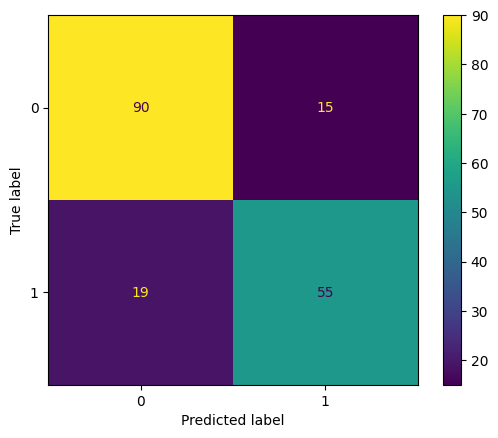

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred = model.predict(X_test_scaled)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


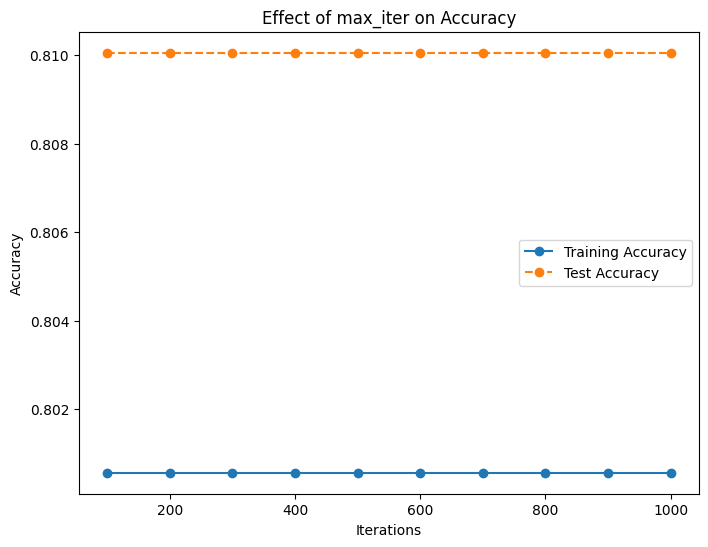

In [54]:
import numpy as np

train_acc = []
test_acc = []
iterations = np.arange(100, 1100, 100)

for i in iterations:
    model = LogisticRegression(max_iter=i)
    model.fit(X_train_scaled, y_train)
    train_acc.append(model.score(X_train_scaled, y_train))
    test_acc.append(model.score(X_test_scaled, y_test))

plt.figure(figsize=(8,6))
plt.plot(iterations, train_acc, label="Training Accuracy", marker="o")
plt.plot(iterations, test_acc, label="Test Accuracy", marker="o", linestyle="--")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Effect of max_iter on Accuracy")
plt.legend()
plt.show()


In [55]:
import joblib

# Save the trained model
joblib.dump(model, "titanic_model.pkl")

# Save the scaler as well (to ensure new data is transformed the same way)
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [56]:
import os
print(os.path.exists("titanic_model.pkl"))  # Should print True
print(os.path.exists("scaler.pkl"))  # Should print True


True
True
